In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# Import data
Using pandas to read the .dat files

In [3]:
users = pd.read_csv('../dataset/users.dat', sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')
ratings = pd.read_csv('../dataset/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
movies_train = pd.read_csv('../dataset/movies_train.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_test = pd.read_csv('../dataset/movies_test.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_train['genre'] = movies_train.genre.str.split('|')
movies_test['genre'] = movies_test.genre.str.split('|')

users.age = users.age.astype('category')
users.gender = users.gender.astype('category')
users.occupation = users.occupation.astype('category')
ratings.movieid = ratings.movieid.astype('category')
ratings.userid = ratings.userid.astype('category')

Get list of all poster ids in dataset (ml1m-images)

In [61]:
poster_list = [int(id[:-4]) for id in os.listdir('../dataset/ml1m-images')]
poster_list[:10]

[2071, 1955, 3931, 3062, 204, 1523, 1222, 1348, 3823, 3835]

Get list of all genres in dataset

In [68]:
genres = []
with open('../dataset/genres.txt', 'r') as f:
    # genres = f.readlines()
    genres = [genre.strip() for genre in f.readlines()]
genres

['Crime',
 'Thriller',
 'Fantasy',
 'Horror',
 'Sci-Fi',
 'Comedy',
 'Documentary',
 'Adventure',
 'Film-Noir',
 'Animation',
 'Romance',
 'Drama',
 'Western',
 'Musical',
 'Action',
 'Mystery',
 'War',
 "Children's"]

In [4]:
movies_train

,title,genre
movieid,,
1650,Washington Square (1997),[Drama]
185,"Net, The (1995)","[Sci-Fi, Thriller]"
1377,Batman Returns (1992),"[Action, Adventure, Comedy, Crime]"
3204,"Boys from Brazil, The (1978)",[Thriller]
1901,Dear Jesse (1997),[Documentary]
...,...,...
2539,Analyze This (1999),[Comedy]
3038,"Face in the Crowd, A (1957)",[Drama]
1832,Heaven's Burning (1997),"[Action, Drama]"


# Cleaning the title
## Changing:
- Only keep the main title, remove year and native language title name (inside the parenthesis)
- Strip all extras spaces in the title
- Lowercase the title
- If the title's first word is moved to the end, move it back to the front (articles like 'a', 'an', 'the', ...)

In [18]:
# article words (Eng, Fr, Ger, Sp)
words = ['a', 'an', 'the', 'el', 'il', 'le', 'la', 'les' ,'l\'', 'der', 'das']
def cleanTitle(title):
    loc = title.find('(')
    if loc != -1:
        title = title[:loc]
    title = title.strip()
    title = title.lower()
    if title.find(',') != -1:
        last_word = title.split(', ')[-1]
        if last_word in words:
            loc = title.rfind(',')
            title = last_word + ' ' + title[:loc]
    return title

# temp_movies_train = movies_train.copy()
# temp_movies_test = movies_test.copy()

movies_test['title'] = movies_test['title'].apply(cleanTitle)
movies_train['title'] = movies_train['title'].apply(cleanTitle)

# movies_train = temp_movies_test.copy()
# movies_test = temp_movies_train.copy()

In [17]:
# movies_test
for title in movies_train['title']:
    if title.find(',') != -1:
        last_word = title.split(', ')[-1]
        if len(last_word.split(' ')) == 1 and last_word not in words:
            print(last_word,'|', title)

texas | paris, texas
texas | happy, texas
maine | the beans of egypt, maine
etc. | love, etc.
love | bye bye, love
lover | goodbye, lover
professore! | ciao, professore!
alaska | mystery, alaska
n.m. | truth or consequences, n.m.
vietnam | good morning, vietnam
interrupted | girl, interrupted
302 | 301, 302
corrina | corrina, corrina
niagara | niagara, niagara
guido | kiss me, guido


# Visualize the data

### Dont have poster

In [36]:
movies_train.sort_index(inplace=True)
movies_test.sort_index(inplace=True)
print(len(movies_train), len(movies_test))
print(movies_train.columns.values)
t1 = t2 = 0
for idx in movies_train.index:
    if idx not in poster_list:
        print(idx)
        t1 += 1
for idx in movies_test.index:
    if idx not in poster_list:
        print(idx)
        t2 += 1
print(f'There are {t1}/{len(movies_train)} movies in train set dont have poster')
print(f'There are {t2}/{len(movies_test)} movies in test set dont have poster')
# movies_train

3106 777
['title' 'genre']
33
37
51
53
56
59
67
90
98
109
115
120
133
134
136
138
139
142
155
167
226
258
264
284
285
286
310
311
395
398
399
400
401
402
404
406
526
530
545
557
560
572
578
579
582
584
591
598
604
614
618
620
624
625
629
630
636
641
642
644
651
652
654
655
657
658
660
664
672
675
676
679
682
684
687
690
693
696
698
699
701
706
712
713
717
721
723
727
729
730
734
738
749
755
756
757
758
763
768
770
772
773
774
776
777
787
789
790
791
792
794
795
796
797
811
812
814
815
816
819
822
823
825
827
834
844
845
847
854
855
857
859
865
868
871
872
874
884
887
889
890
894
895
966
972
975
977
979
980
981
983
985
989
993
1001
1002
1026
1039
1040
1045
1052
1062
1065
1070
1075
1098
1102
1106
1107
1108
1110
1115
1133
1134
1137
1138
1140
1142
1143
1145
1146
1149
1155
1156
1157
1158
1160
1165
1174
1306
1308
1309
1311
1314
1315
1316
1318
1319
1360
1384
1386
1420
1424
1430
1434
1436
1444
1448
1467
1470
1486
1519
1522
1524
1528
1532
1543
1548
1553
1555
1558
1559
1561
1567
1568
1578
1579
1

### Rating distribution

In [49]:
# Create ratings_by_movie that contains the number of ratings and average rating for each movie
ratings_by_movie = ratings.groupby('movieid')['rating'].agg(['count', 'mean'])
ratings_by_movie

/tmp/ipykernel_573902/332123606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_by_movie = ratings.groupby('movieid')['rating'].agg(['count', 'mean'])


,count,mean
movieid,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


### Genres reviewed by Users

In [50]:
movies = pd.concat([movies_train, movies_test])

In [100]:
# UserID is from 1 to 6040

# using DataFrame and .loc to access 
# => very slow when use 'user_genre.loc[uid, movies.loc[movieid, 'genre']] += 1' (12m11s total)
# => slow when use the following, extracting the list of genres first (2m15s total)

# user_genre = pd.DataFrame(index=range(1, 6041), columns=genres + ['total'])
# for uid in range(1, 6041):
#     for genre in genres:
#         user_genre.loc[uid, genre] = 0
#     movies_from_user = ratings.loc[ratings['userid'] == uid]['movieid'].tolist()
#     t = 0
#     for movieid in movies_from_user:
#         if movieid in movies.index:
#             movie_genres = movies.loc[movieid, 'genre']
#             for genre in movie_genres:
#                 user_genre.loc[uid, genre] += 1
#                 t += 1
#     user_genre.loc[uid, 'total'] = t

In [92]:
# using list first then convert to dataframe
# => faster (10.6s total)

user2genre = []
for uid in range(1, 6041):
    userX = [0] * (len(genres) + 1)  
    movies_from_user = ratings.loc[ratings['userid'] == uid]['movieid'].tolist()
    t = 0
    for movieid in movies_from_user:
        if movieid in movies.index:
            movie_genres = movies.loc[movieid, 'genre']
            for genre in movie_genres:
                userX[genres.index(genre)] += 1
                t += 1
    userX[-1] = t
    user2genre.append(userX)
user2genre = pd.DataFrame(user2genre, columns=genres + ['total'], index=range(1, 6041))

In [103]:
# user2genre.compare(user_genre)
user2genre.to_csv('../dataset/user2genre.csv')

In [106]:
user2genre

,Crime,Thriller,Fantasy,Horror,Sci-Fi,Comedy,Documentary,Adventure,Film-Noir,Animation,Romance,Drama,Western,Musical,Action,Mystery,War,Children's,total
1,2,3,3,0,3,14,0,5,0,18,6,21,0,14,5,0,2,20,116
2,12,31,1,2,17,25,0,19,1,0,24,79,3,0,56,3,15,0,288
3,0,5,2,3,6,30,0,25,0,3,5,8,6,1,23,1,2,3,123
4,1,4,2,3,9,0,0,6,0,0,2,6,2,0,19,0,3,1,58
5,21,39,0,10,15,56,6,9,3,4,30,104,1,3,31,8,6,6,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,53,147,19,74,169,261,11,83,17,34,122,372,14,31,154,34,42,54,1691
6037,18,68,4,9,39,59,1,9,9,1,22,98,4,4,28,13,16,6,408
6038,0,0,0,2,1,12,0,1,0,3,6,9,0,0,2,0,4,1,41
6039,2,14,5,1,8,65,0,10,6,13,30,28,2,42,8,17,9,17,277


<Figure size 640x480 with 0 Axes>

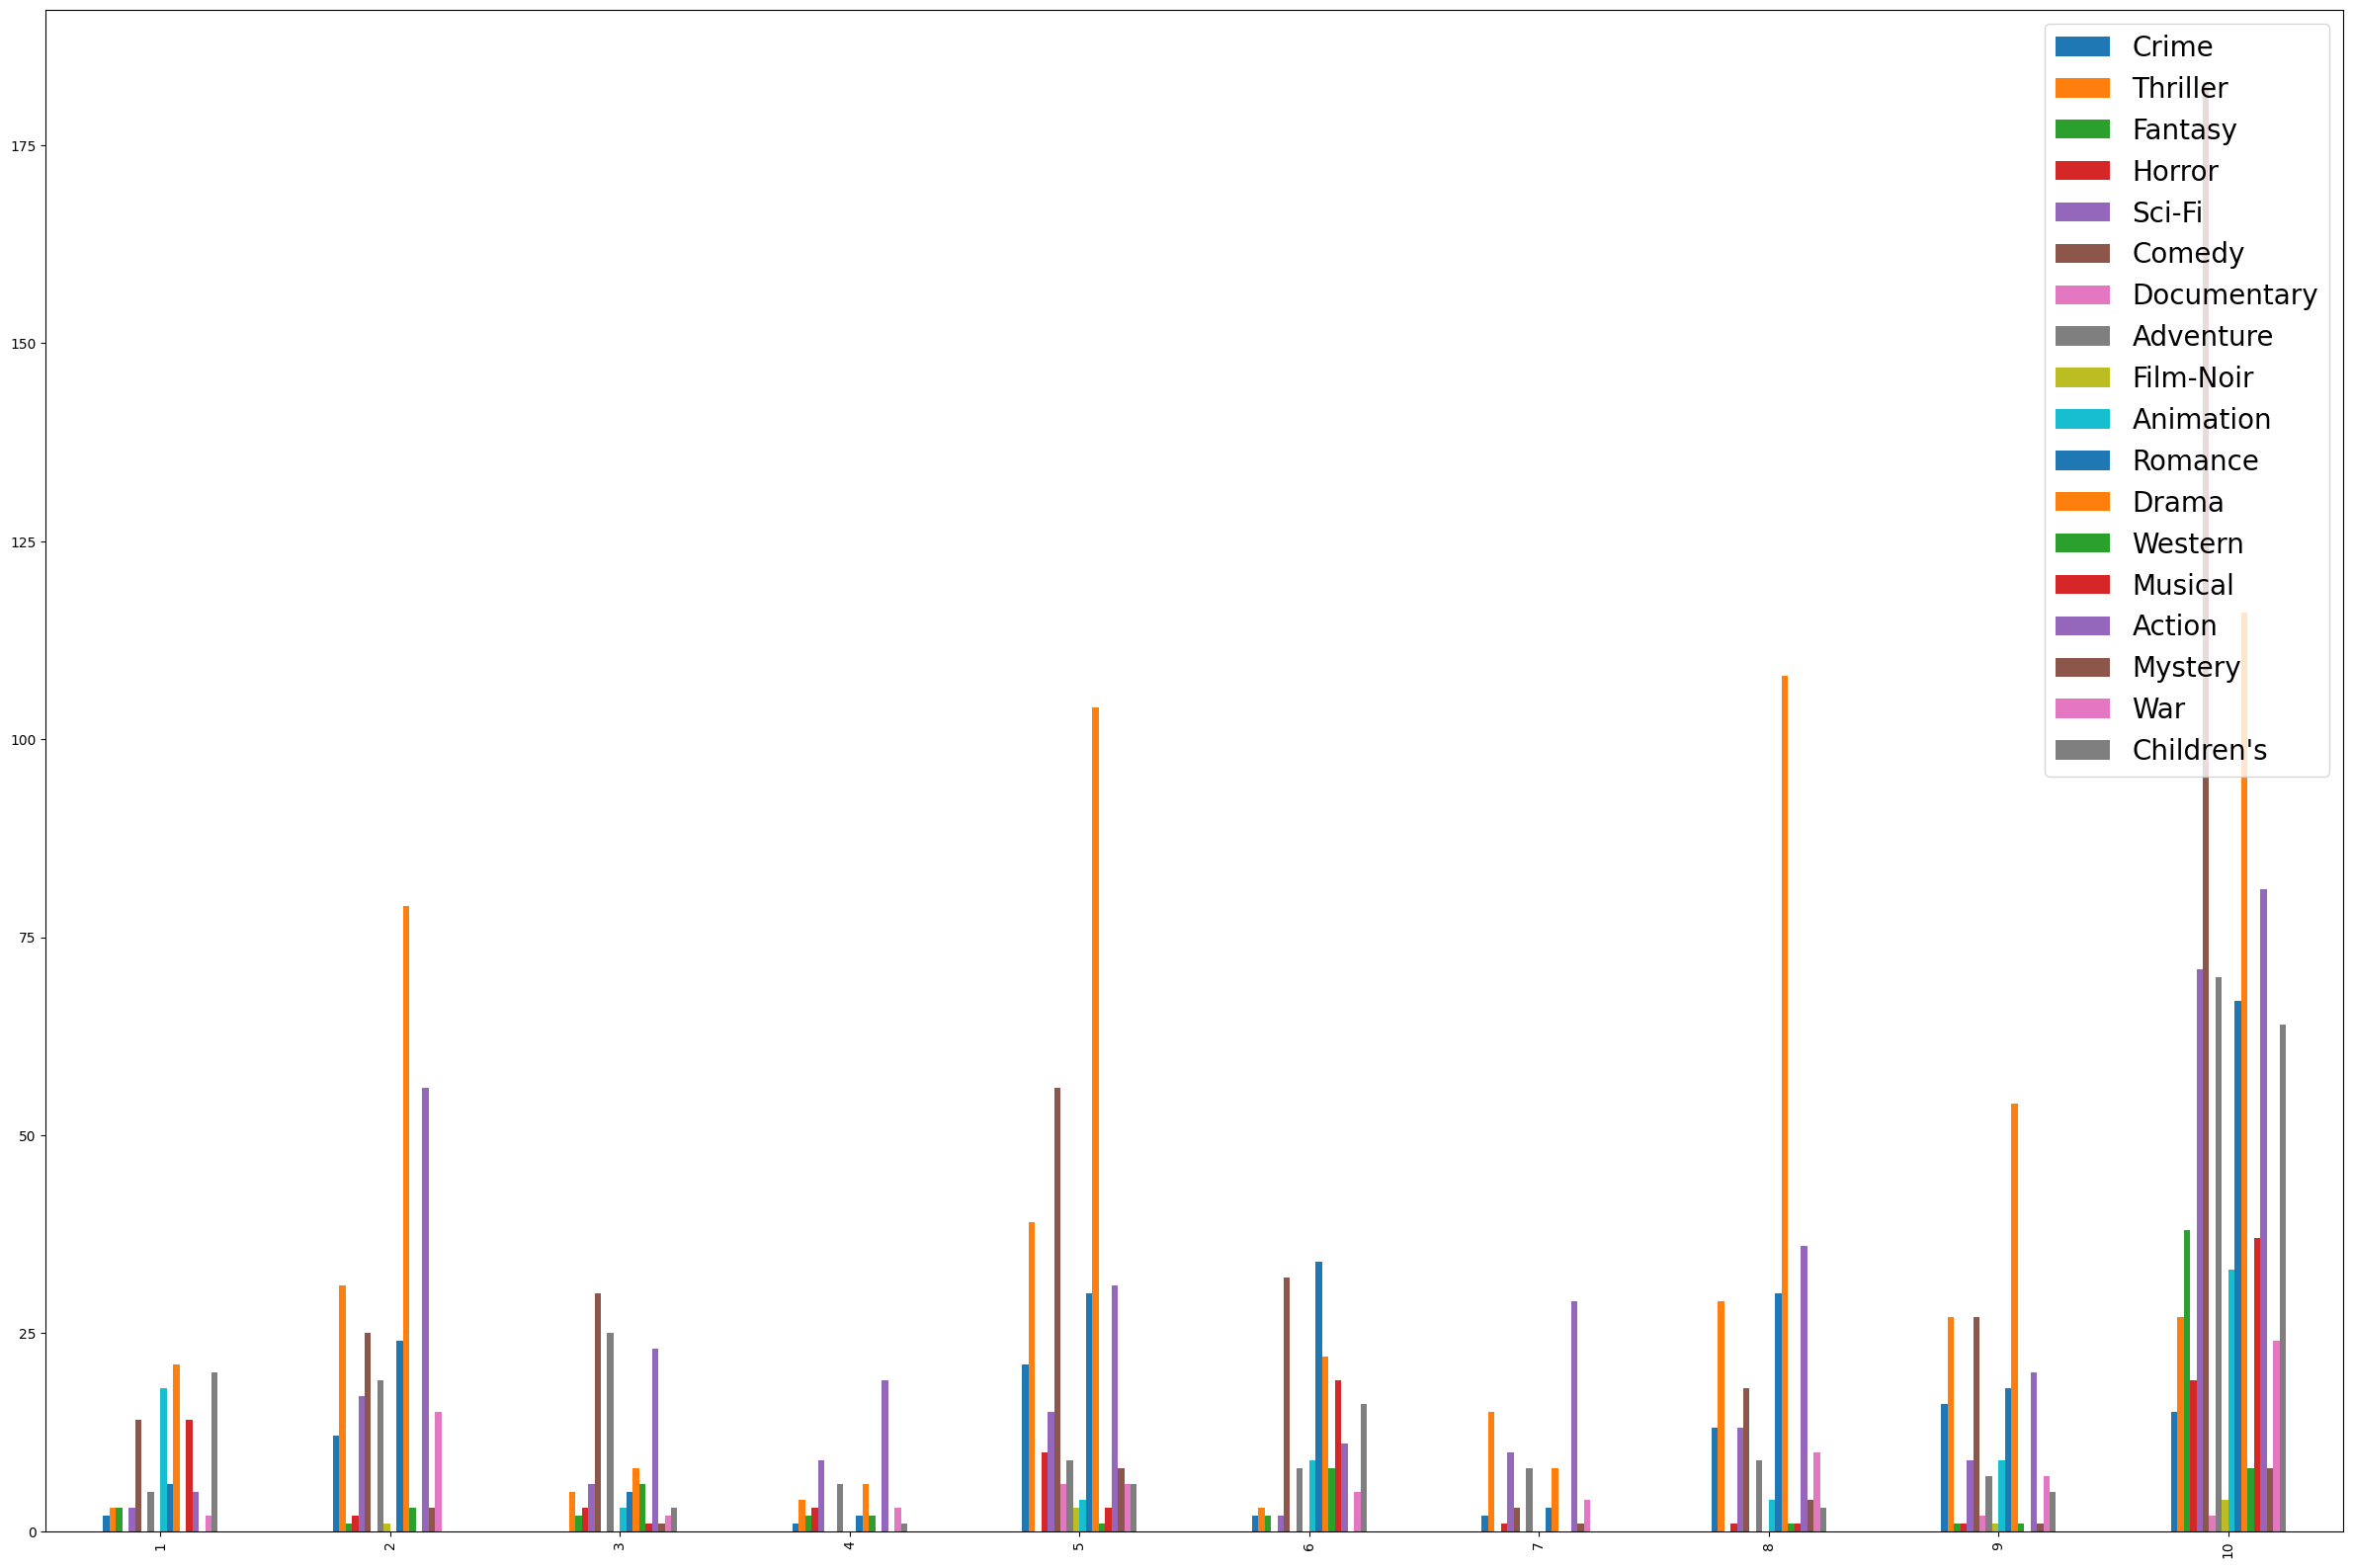

In [130]:
plt.figure()
user2genre.loc[:10,user2genre.columns != 'total'].plot(kind='bar',figsize=(30,20))
plt.legend(loc='upper right', prop={'size': 20})